# Text Analysis in Python

## Dataharvest

Natalie Widmann

# Agenda

- Reading in text data
- Preprocessing texts (pdfs)
- Word / Character Counts
- Most Common Words
- Extraction of Names, Places and Dates
- 


In [47]:
import os
os.getcwd()

'/home/natalie/Documents/Datenjournalismus in Python/Code/vorlesung'

In [ ]:
path = '/home/natalie/Documents/Datenjournalismus in Python/Code/data/wahlprogramme'

In [49]:
path = '../data/wahlprogramme/fdp.txt'
with open(path) as f:
    fdp_text = f.read()

In [50]:
fdp_text

'\x0cNie gab es mehr zu tun.\nWie es ist, darf es nicht bleiben\nWie es ist, darf es nicht bleiben. Das hat die Pandemie gezeigt. Gespürt haben wir es schon vorher.\nDenn die Welt verändert sich rasant. Daraus erwachsen Chancen und Risiken. Wenn wir nichts\nändern, tragen wir die Risiken, und die Chancen ergreifen andere. Trotzdem wurde in Deutschland zu\nlange das trügerische Bild vermittelt, dass alles bleiben könne, wie es ist. Viele haben dem\nVersprechen vertraut, dass Deutschland das Land bleiben könne, in dem wir gut und gerne leben,\nohne dass wir etwas verändern müssen. Heute wissen wir: Das war falsch!\nDas Ergebnis war eine Politik, die unseren Staat satt und träge gemacht hat – statt schlank und stark.\nDas hat die Pandemie gezeigt. Während andere Staaten ihre Verwaltung digitalisiert haben, haben\nwir an Formularen und Zettelwirtschaft festgehalten. Während andere Staaten ihr\nGesundheitssystem digitalisiert haben, haben sich unsere Gesundheitsämter gegenseitig Faxe\ngesch

In [52]:
import os
path = '../data/wahlprogramme/'
os.listdir(path)

['Gruene.txt', 'cdu.txt', 'linke.txt', 'AfD.txt', 'fdp.txt', 'spd.txt']

### Alle Wahlprogramme einlesen

In [53]:
# Alle Files in einem Ordner ausgeben
import os

path = '../data/wahlprogramme/'
for file_path in os.listdir(path):
    print(file_path)


Gruene.txt
cdu.txt
linke.txt
AfD.txt
fdp.txt
spd.txt


In [54]:
# Alle Files in einem Ordner einlesen
path = '../data/wahlprogramme/'
programs = []
for file_path in os.listdir(path):
    with open(path + file_path) as f:
        programs.append(f.read())

In [56]:
len(programs)

6

In [57]:
# Alle Files mit Partei einlesen und speichern
path = '../data/wahlprogramme/'
programs = []
for file_path in os.listdir(path):
    # Extrahiere die Partei
    party = file_path.replace('.txt', '').lower()
    # Einlesen der Datei
    with open(path + file_path) as f:     
        program = f.read()
    data = {'party': party, 'text': program}
    programs.append(data)

In [58]:
programs

[{'party': 'gruene',
  'text': '\n\x0cEINE EINLADUNG\n\nLiebe Wählerinnen und Wähler,\ndurch Wahlen entscheidet eine Gesellschaft, wer sie sein will. Das gilt erst recht für diese Bundestagswahl am 26. September. Mit ihr endet eine Ära, und eine neue kann beginnen. Zukunft\nist aber nichts, was uns einfach widerfährt. Sie, liebe Wählerinnen und Wähler, können mit Ihrer\nStimme selbst entscheiden, welche Richtung sie nimmt.\nWir, BÜNDNIS 90/Die Grünen, legen mit diesem Programm unser inhaltliches Angebot an Sie\nvor. Wir tun dies in einer Zeit des globalen Ausnahmezustands. Die Pandemie hat uns alle bis\nins Mark getroffen. Sie hat im Guten gezeigt, zu welcher Gemeinsamkeit, Innovationskraft und\nWiderstandsfähigkeit wir Menschen fähig sind. Sie hat aber auch die Schwachstellen unserer Gesellschaft schonungslos offengelegt, und das in einer ohnehin verwundbaren Welt. Die globalen\nKrisen dieser Zeit – zuallererst die Klimakrise als wahre Menschheitskrise – wirken in unser aller\nLeben h

In [59]:
import pandas as pd
df = pd.DataFrame(programs)

In [60]:
df

party                                               text
0  gruene  \n
EINE EINLADUNG\n\nLiebe Wählerinnen und Wäh...
1     cdu  \nEinleitung\n\n1\n2\n3\n4\n5\n6\n7\n8\n\nDeut...
2   linke  
Einleitung\nÜber die Zukunft wird jetzt entsc...
3     afd  \nKAPITEL 1\n\nDemokratie und\nRechtsstaat\n\n...
4     fdp  
Nie gab es mehr zu tun.\nWie es ist, darf es ...
5     spd  \nKapitel 1\n\n1.0. Zukunft. Respekt. Europa.\...

## Text säubern

In [61]:
fdp_text

'\x0cNie gab es mehr zu tun.\nWie es ist, darf es nicht bleiben\nWie es ist, darf es nicht bleiben. Das hat die Pandemie gezeigt. Gespürt haben wir es schon vorher.\nDenn die Welt verändert sich rasant. Daraus erwachsen Chancen und Risiken. Wenn wir nichts\nändern, tragen wir die Risiken, und die Chancen ergreifen andere. Trotzdem wurde in Deutschland zu\nlange das trügerische Bild vermittelt, dass alles bleiben könne, wie es ist. Viele haben dem\nVersprechen vertraut, dass Deutschland das Land bleiben könne, in dem wir gut und gerne leben,\nohne dass wir etwas verändern müssen. Heute wissen wir: Das war falsch!\nDas Ergebnis war eine Politik, die unseren Staat satt und träge gemacht hat – statt schlank und stark.\nDas hat die Pandemie gezeigt. Während andere Staaten ihre Verwaltung digitalisiert haben, haben\nwir an Formularen und Zettelwirtschaft festgehalten. Während andere Staaten ihr\nGesundheitssystem digitalisiert haben, haben sich unsere Gesundheitsämter gegenseitig Faxe\ngesch

In [63]:
fdp_text.replace('\n', ' ')

'\x0cNie gab es mehr zu tun. Wie es ist, darf es nicht bleiben Wie es ist, darf es nicht bleiben. Das hat die Pandemie gezeigt. Gespürt haben wir es schon vorher. Denn die Welt verändert sich rasant. Daraus erwachsen Chancen und Risiken. Wenn wir nichts ändern, tragen wir die Risiken, und die Chancen ergreifen andere. Trotzdem wurde in Deutschland zu lange das trügerische Bild vermittelt, dass alles bleiben könne, wie es ist. Viele haben dem Versprechen vertraut, dass Deutschland das Land bleiben könne, in dem wir gut und gerne leben, ohne dass wir etwas verändern müssen. Heute wissen wir: Das war falsch! Das Ergebnis war eine Politik, die unseren Staat satt und träge gemacht hat – statt schlank und stark. Das hat die Pandemie gezeigt. Während andere Staaten ihre Verwaltung digitalisiert haben, haben wir an Formularen und Zettelwirtschaft festgehalten. Während andere Staaten ihr Gesundheitssystem digitalisiert haben, haben sich unsere Gesundheitsämter gegenseitig Faxe geschickt. Hochqu

In [67]:
def clean_text(text):
    text = text.strip()
    text = text.replace('\n', ' ')
    return text

In [68]:
clean_text(fdp_text)

'Nie gab es mehr zu tun. Wie es ist, darf es nicht bleiben Wie es ist, darf es nicht bleiben. Das hat die Pandemie gezeigt. Gespürt haben wir es schon vorher. Denn die Welt verändert sich rasant. Daraus erwachsen Chancen und Risiken. Wenn wir nichts ändern, tragen wir die Risiken, und die Chancen ergreifen andere. Trotzdem wurde in Deutschland zu lange das trügerische Bild vermittelt, dass alles bleiben könne, wie es ist. Viele haben dem Versprechen vertraut, dass Deutschland das Land bleiben könne, in dem wir gut und gerne leben, ohne dass wir etwas verändern müssen. Heute wissen wir: Das war falsch! Das Ergebnis war eine Politik, die unseren Staat satt und träge gemacht hat – statt schlank und stark. Das hat die Pandemie gezeigt. Während andere Staaten ihre Verwaltung digitalisiert haben, haben wir an Formularen und Zettelwirtschaft festgehalten. Während andere Staaten ihr Gesundheitssystem digitalisiert haben, haben sich unsere Gesundheitsämter gegenseitig Faxe geschickt. Hochqualif

### Auf alle Wahlprogramme im Dataframe anwenden

In [69]:
df['clean_text'] = df['text'].apply(clean_text)

In [70]:
df

party                                               text  \
0  gruene  \n
EINE EINLADUNG\n\nLiebe Wählerinnen und Wäh...   
1     cdu  \nEinleitung\n\n1\n2\n3\n4\n5\n6\n7\n8\n\nDeut...   
2   linke  
Einleitung\nÜber die Zukunft wird jetzt entsc...   
3     afd  \nKAPITEL 1\n\nDemokratie und\nRechtsstaat\n\n...   
4     fdp  
Nie gab es mehr zu tun.\nWie es ist, darf es ...   
5     spd  \nKapitel 1\n\n1.0. Zukunft. Respekt. Europa.\...   

                                          clean_text  
0  EINE EINLADUNG  Liebe Wählerinnen und Wähler, ...  
1  Einleitung  1 2 3 4 5 6 7 8  Deutschland ist e...  
2  Einleitung Über die Zukunft wird jetzt entschi...  
3  KAPITEL 1  Demokratie und Rechtsstaat  
12  De...  
4  Nie gab es mehr zu tun. Wie es ist, darf es ni...  
5  Kapitel 1  1.0. Zukunft. Respekt. Europa. Am A...

## Text Analyse

nltk

In [71]:
!pip install nltk

import nltk
nltk.download('punkt')

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package punkt to /home/natalie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Anzahl der Sätze und Anzahl der Wörter

In [72]:
from nltk import sent_tokenize
sentences = sent_tokenize(fdp_text)

In [73]:
sentences

['\x0cNie gab es mehr zu tun.',
 'Wie es ist, darf es nicht bleiben\nWie es ist, darf es nicht bleiben.',
 'Das hat die Pandemie gezeigt.',
 'Gespürt haben wir es schon vorher.',
 'Denn die Welt verändert sich rasant.',
 'Daraus erwachsen Chancen und Risiken.',
 'Wenn wir nichts\nändern, tragen wir die Risiken, und die Chancen ergreifen andere.',
 'Trotzdem wurde in Deutschland zu\nlange das trügerische Bild vermittelt, dass alles bleiben könne, wie es ist.',
 'Viele haben dem\nVersprechen vertraut, dass Deutschland das Land bleiben könne, in dem wir gut und gerne leben,\nohne dass wir etwas verändern müssen.',
 'Heute wissen wir: Das war falsch!',
 'Das Ergebnis war eine Politik, die unseren Staat satt und träge gemacht hat – statt schlank und stark.',
 'Das hat die Pandemie gezeigt.',
 'Während andere Staaten ihre Verwaltung digitalisiert haben, haben\nwir an Formularen und Zettelwirtschaft festgehalten.',
 'Während andere Staaten ihr\nGesundheitssystem digitalisiert haben, haben sic

In [74]:
len(sentences)

2095

In [75]:
def count_sentences(text):
    sentences = sent_tokenize(text)
    return len(sentences)

In [76]:
df['sentences_count'] = df['clean_text'].apply(count_sentences)

In [77]:
df

party                                               text  \
0  gruene  \n
EINE EINLADUNG\n\nLiebe Wählerinnen und Wäh...   
1     cdu  \nEinleitung\n\n1\n2\n3\n4\n5\n6\n7\n8\n\nDeut...   
2   linke  
Einleitung\nÜber die Zukunft wird jetzt entsc...   
3     afd  \nKAPITEL 1\n\nDemokratie und\nRechtsstaat\n\n...   
4     fdp  
Nie gab es mehr zu tun.\nWie es ist, darf es ...   
5     spd  \nKapitel 1\n\n1.0. Zukunft. Respekt. Europa.\...   

                                          clean_text  sentences_count  
0  EINE EINLADUNG  Liebe Wählerinnen und Wähler, ...             2664  
1  Einleitung  1 2 3 4 5 6 7 8  Deutschland ist e...             2663  
2  Einleitung Über die Zukunft wird jetzt entschi...             3755  
3  KAPITEL 1  Demokratie und Rechtsstaat  
12  De...             1616  
4  Nie gab es mehr zu tun. Wie es ist, darf es ni...             2095  
5  Kapitel 1  1.0. Zukunft. Respekt. Europa. Am A...             1498

In [78]:
from nltk import word_tokenize
words = word_tokenize(fdp_text)

In [79]:
words

['Nie',
 'gab',
 'es',
 'mehr',
 'zu',
 'tun',
 '.',
 'Wie',
 'es',
 'ist',
 ',',
 'darf',
 'es',
 'nicht',
 'bleiben',
 'Wie',
 'es',
 'ist',
 ',',
 'darf',
 'es',
 'nicht',
 'bleiben',
 '.',
 'Das',
 'hat',
 'die',
 'Pandemie',
 'gezeigt',
 '.',
 'Gespürt',
 'haben',
 'wir',
 'es',
 'schon',
 'vorher',
 '.',
 'Denn',
 'die',
 'Welt',
 'verändert',
 'sich',
 'rasant',
 '.',
 'Daraus',
 'erwachsen',
 'Chancen',
 'und',
 'Risiken',
 '.',
 'Wenn',
 'wir',
 'nichts',
 'ändern',
 ',',
 'tragen',
 'wir',
 'die',
 'Risiken',
 ',',
 'und',
 'die',
 'Chancen',
 'ergreifen',
 'andere',
 '.',
 'Trotzdem',
 'wurde',
 'in',
 'Deutschland',
 'zu',
 'lange',
 'das',
 'trügerische',
 'Bild',
 'vermittelt',
 ',',
 'dass',
 'alles',
 'bleiben',
 'könne',
 ',',
 'wie',
 'es',
 'ist',
 '.',
 'Viele',
 'haben',
 'dem',
 'Versprechen',
 'vertraut',
 ',',
 'dass',
 'Deutschland',
 'das',
 'Land',
 'bleiben',
 'könne',
 ',',
 'in',
 'dem',
 'wir',
 'gut',
 'und',
 'gerne',
 'leben',
 ',',
 'ohne',
 'dass',
 

In [80]:
len(words)

39658

#### Satzzeichen entfernen

In [81]:
satzzeichen = ['.', ',', '?', ':', ';', '!', '-']

clean_words = []
for word in words:
    if word not in satzzeichen:
        clean_words.append(word)

In [82]:
clean_words

['Nie',
 'gab',
 'es',
 'mehr',
 'zu',
 'tun',
 'Wie',
 'es',
 'ist',
 'darf',
 'es',
 'nicht',
 'bleiben',
 'Wie',
 'es',
 'ist',
 'darf',
 'es',
 'nicht',
 'bleiben',
 'Das',
 'hat',
 'die',
 'Pandemie',
 'gezeigt',
 'Gespürt',
 'haben',
 'wir',
 'es',
 'schon',
 'vorher',
 'Denn',
 'die',
 'Welt',
 'verändert',
 'sich',
 'rasant',
 'Daraus',
 'erwachsen',
 'Chancen',
 'und',
 'Risiken',
 'Wenn',
 'wir',
 'nichts',
 'ändern',
 'tragen',
 'wir',
 'die',
 'Risiken',
 'und',
 'die',
 'Chancen',
 'ergreifen',
 'andere',
 'Trotzdem',
 'wurde',
 'in',
 'Deutschland',
 'zu',
 'lange',
 'das',
 'trügerische',
 'Bild',
 'vermittelt',
 'dass',
 'alles',
 'bleiben',
 'könne',
 'wie',
 'es',
 'ist',
 'Viele',
 'haben',
 'dem',
 'Versprechen',
 'vertraut',
 'dass',
 'Deutschland',
 'das',
 'Land',
 'bleiben',
 'könne',
 'in',
 'dem',
 'wir',
 'gut',
 'und',
 'gerne',
 'leben',
 'ohne',
 'dass',
 'wir',
 'etwas',
 'verändern',
 'müssen',
 'Heute',
 'wissen',
 'wir',
 'Das',
 'war',
 'falsch',
 'Da

In [83]:
len(clean_words)

36150

In [84]:
# Funktion clean_words

def clean_words(text, exclude):
    words = word_tokenize(text)
    clean_words = []
    for word in words:
        if word not in exclude:
            clean_words.append(word)
    return clean_words

In [85]:
satzzeichen = ['.', ',', '?', ':', ';', '!', '-']
df['words'] = df['clean_text'].apply(clean_words, exclude=satzzeichen)
df

party                                               text  \
0  gruene  \n
EINE EINLADUNG\n\nLiebe Wählerinnen und Wäh...   
1     cdu  \nEinleitung\n\n1\n2\n3\n4\n5\n6\n7\n8\n\nDeut...   
2   linke  
Einleitung\nÜber die Zukunft wird jetzt entsc...   
3     afd  \nKAPITEL 1\n\nDemokratie und\nRechtsstaat\n\n...   
4     fdp  
Nie gab es mehr zu tun.\nWie es ist, darf es ...   
5     spd  \nKapitel 1\n\n1.0. Zukunft. Respekt. Europa.\...   

                                          clean_text  sentences_count  \
0  EINE EINLADUNG  Liebe Wählerinnen und Wähler, ...             2664   
1  Einleitung  1 2 3 4 5 6 7 8  Deutschland ist e...             2663   
2  Einleitung Über die Zukunft wird jetzt entschi...             3755   
3  KAPITEL 1  Demokratie und Rechtsstaat  
12  De...             1616   
4  Nie gab es mehr zu tun. Wie es ist, darf es ni...             2095   
5  Kapitel 1  1.0. Zukunft. Respekt. Europa. Am A...             1498   

                                               words  
0  [EINE, EINLADUNG, Liebe, Wählerinnen, und, Wäh...  
1  [Einleitung, 1, 2, 3, 4, 5, 6, 7, 8, Deutschla...  
2  [Einleitung, Über, die, Zukunft, wird, jetzt, ...  
3  [KAPITEL, 1, Demokratie, und, Rechtsstaat, 12,...  
4  [Nie, gab, es, mehr, zu, tun, Wie, es, ist, da...  
5  [Kapitel, 1, 1.0, Zukunft, Respekt, Europa, Am...

In [86]:
df['word_count'] = df['words'].apply(len)
df

party                                               text  \
0  gruene  \n
EINE EINLADUNG\n\nLiebe Wählerinnen und Wäh...   
1     cdu  \nEinleitung\n\n1\n2\n3\n4\n5\n6\n7\n8\n\nDeut...   
2   linke  
Einleitung\nÜber die Zukunft wird jetzt entsc...   
3     afd  \nKAPITEL 1\n\nDemokratie und\nRechtsstaat\n\n...   
4     fdp  
Nie gab es mehr zu tun.\nWie es ist, darf es ...   
5     spd  \nKapitel 1\n\n1.0. Zukunft. Respekt. Europa.\...   

                                          clean_text  sentences_count  \
0  EINE EINLADUNG  Liebe Wählerinnen und Wähler, ...             2664   
1  Einleitung  1 2 3 4 5 6 7 8  Deutschland ist e...             2663   
2  Einleitung Über die Zukunft wird jetzt entschi...             3755   
3  KAPITEL 1  Demokratie und Rechtsstaat  
12  De...             1616   
4  Nie gab es mehr zu tun. Wie es ist, darf es ni...             2095   
5  Kapitel 1  1.0. Zukunft. Respekt. Europa. Am A...             1498   

                                               words  word_count  
0  [EINE, EINLADUNG, Liebe, Wählerinnen, und, Wäh...       48762  
1  [Einleitung, 1, 2, 3, 4, 5, 6, 7, 8, Deutschla...       49943  
2  [Einleitung, Über, die, Zukunft, wird, jetzt, ...       55832  
3  [KAPITEL, 1, Demokratie, und, Rechtsstaat, 12,...       27795  
4  [Nie, gab, es, mehr, zu, tun, Wie, es, ist, da...       36150  
5  [Kapitel, 1, 1.0, Zukunft, Respekt, Europa, Am...       24665

### Most frequent Words

In [87]:
fdp_words = df.loc[4, 'words']

In [88]:
from nltk.probability import FreqDist

fdp_words = df.loc[4, 'words']
fdist = FreqDist(fdp_words)
fdist.most_common()

[('und', 1707),
 ('die', 1110),
 ('der', 1006),
 ('für', 620),
 ('Wir', 535),
 ('wollen', 481),
 ('in', 478),
 ('wir', 423),
 ('von', 389),
 ('zu', 381),
 ('Freie', 376),
 ('Demokraten', 375),
 ('den', 361),
 ('eine', 359),
 ('werden', 334),
 ('auf', 242),
 ('ein', 238),
 ('das', 215),
 ('des', 211),
 ('mit', 210),
 ('ist', 191),
 ('im', 189),
 ('auch', 181),
 ('Die', 175),
 ('durch', 157),
 ('nicht', 156),
 ('muss', 144),
 ('einer', 136),
 ('sowie', 135),
 ('uns', 131),
 ('oder', 127),
 ('bei', 126),
 ('als', 124),
 ('zur', 123),
 ('müssen', 119),
 ('–', 118),
 ('einen', 117),
 ('dass', 115),
 ('an', 114),
 ('mehr', 112),
 ('können', 112),
 ('„', 110),
 ('fordern', 110),
 ('dem', 107),
 ('“', 107),
 ('Deutschland', 106),
 ('sind', 105),
 ('wie', 101),
 ('es', 98),
 ('soll', 97),
 ('(', 97),
 (')', 97),
 ('zum', 96),
 ('sich', 92),
 ('aus', 88),
 ('Das', 84),
 ('sein', 84),
 ('um', 81),
 ('sollen', 80),
 ('setzen', 78),
 ('Menschen', 71),
 ('kann', 71),
 ('sie', 70),
 ('stärken', 69),


### Anpassungen der clean_words Funktion

- Weiter Satzzeichen (, ), ", entfernen
- alle Wörter kleinschreiben
- Füllwörter entfernen

In [91]:
# Funktion clean_words
def clean_words(text, exclude=satzzeichen):
    words = word_tokenize(text)
    clean_words = []
    for word in words:
        if word not in exclude:
            clean_words.append(word.lower())
    return clean_words

In [92]:
satzzeichen = ['.', ',', '?', ':', ';', '!', '-', '(', ')', '"', "“", '„', '–']
df['words'] = df['clean_text'].apply(clean_words, exclude=satzzeichen)
df

party                                               text  \
0  gruene  \n
EINE EINLADUNG\n\nLiebe Wählerinnen und Wäh...   
1     cdu  \nEinleitung\n\n1\n2\n3\n4\n5\n6\n7\n8\n\nDeut...   
2   linke  
Einleitung\nÜber die Zukunft wird jetzt entsc...   
3     afd  \nKAPITEL 1\n\nDemokratie und\nRechtsstaat\n\n...   
4     fdp  
Nie gab es mehr zu tun.\nWie es ist, darf es ...   
5     spd  \nKapitel 1\n\n1.0. Zukunft. Respekt. Europa.\...   

                                          clean_text  sentences_count  \
0  EINE EINLADUNG  Liebe Wählerinnen und Wähler, ...             2664   
1  Einleitung  1 2 3 4 5 6 7 8  Deutschland ist e...             2663   
2  Einleitung Über die Zukunft wird jetzt entschi...             3755   
3  KAPITEL 1  Demokratie und Rechtsstaat  
12  De...             1616   
4  Nie gab es mehr zu tun. Wie es ist, darf es ni...             2095   
5  Kapitel 1  1.0. Zukunft. Respekt. Europa. Am A...             1498   

                                               words  word_count  
0  [eine, einladung, liebe, wählerinnen, und, wäh...       48762  
1  [einleitung, 1, 2, 3, 4, 5, 6, 7, 8, deutschla...       49943  
2  [einleitung, über, die, zukunft, wird, jetzt, ...       55832  
3  [kapitel, 1, demokratie, und, rechtsstaat, 12,...       27795  
4  [nie, gab, es, mehr, zu, tun, wie, es, ist, da...       36150  
5  [kapitel, 1, 1.0, zukunft, respekt, europa, am...       24665

In [93]:
from nltk.probability import FreqDist

fdp_words = df.loc[4, 'words']
fdist = FreqDist(fdp_words)
fdist.most_common(10)

[('und', 1714),
 ('die', 1285),
 ('der', 1064),
 ('wir', 958),
 ('für', 676),
 ('in', 500),
 ('wollen', 481),
 ('von', 397),
 ('eine', 388),
 ('freie', 385)]

### Füllwörter entfernen

In [94]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = stopwords.words('german')
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/natalie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [95]:
# Funktion clean_words
def clean_words(text, exclude):
    words = word_tokenize(text)
    clean = []
    for word in words:
        if word.lower() not in exclude:
            clean.append(word.lower())
    return clean

In [96]:
satzzeichen = ['.', ',', '?', ':', ';', '!', '-', '(', ')', '"', "“", '„', '–', '•', '', '*']
exclude = satzzeichen + stopwords

df['words'] = df['clean_text'].apply(clean_words, exclude=exclude)
df

party                                               text  \
0  gruene  \n
EINE EINLADUNG\n\nLiebe Wählerinnen und Wäh...   
1     cdu  \nEinleitung\n\n1\n2\n3\n4\n5\n6\n7\n8\n\nDeut...   
2   linke  
Einleitung\nÜber die Zukunft wird jetzt entsc...   
3     afd  \nKAPITEL 1\n\nDemokratie und\nRechtsstaat\n\n...   
4     fdp  
Nie gab es mehr zu tun.\nWie es ist, darf es ...   
5     spd  \nKapitel 1\n\n1.0. Zukunft. Respekt. Europa.\...   

                                          clean_text  sentences_count  \
0  EINE EINLADUNG  Liebe Wählerinnen und Wähler, ...             2664   
1  Einleitung  1 2 3 4 5 6 7 8  Deutschland ist e...             2663   
2  Einleitung Über die Zukunft wird jetzt entschi...             3755   
3  KAPITEL 1  Demokratie und Rechtsstaat  
12  De...             1616   
4  Nie gab es mehr zu tun. Wie es ist, darf es ni...             2095   
5  Kapitel 1  1.0. Zukunft. Respekt. Europa. Am A...             1498   

                                               words  word_count  
0  [einladung, liebe, wählerinnen, wähler, wahlen...       48762  
1  [einleitung, 1, 2, 3, 4, 5, 6, 7, 8, deutschla...       49943  
2  [einleitung, zukunft, entschieden, zukunft, ze...       55832  
3  [kapitel, 1, demokratie, rechtsstaat, 12, demo...       27795  
4  [nie, gab, mehr, tun, darf, bleiben, darf, ble...       36150  
5  [kapitel, 1, 1.0, zukunft, respekt, europa, an...       24665

In [97]:
def most_common_words(words, n=20):
    fdist = FreqDist(words)
    return fdist.most_common(n)

fdp_words = df.loc[4, 'words']
most_common_words(fdp_words)

[('freie', 385),
 ('demokraten', 375),
 ('sowie', 135),
 ('mehr', 121),
 ('müssen', 119),
 ('fordern', 110),
 ('deutschland', 106),
 ('sollen', 80),
 ('setzen', 79),
 ('menschen', 71),
 ('stärken', 71),
 ('europäischen', 67),
 ('unternehmen', 63),
 ('schaffen', 62),
 ('eu', 59),
 ('dabei', 56),
 ('ermöglichen', 48),
 ('zudem', 47),
 ('dafür', 46),
 ('daher', 45)]

## Wortwolken

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_clouds(freq_dict):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(freq_dict)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

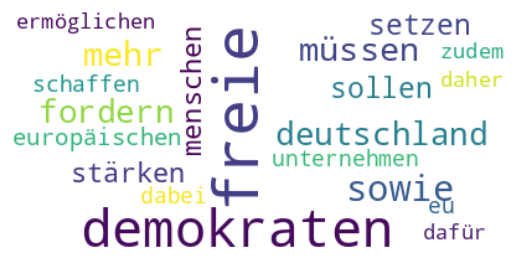

In [99]:
fdp_top_words = most_common_words(fdp_words)
generate_word_clouds(dict(fdp_top_words))


gruene


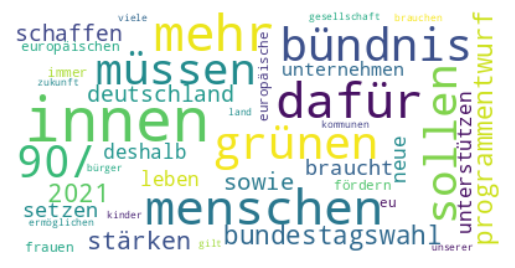

cdu


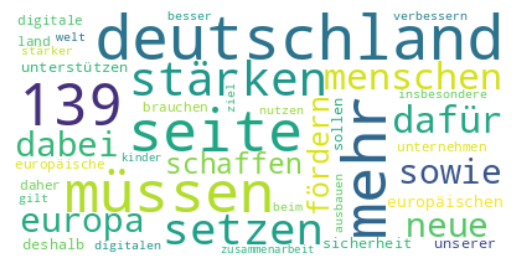

linke


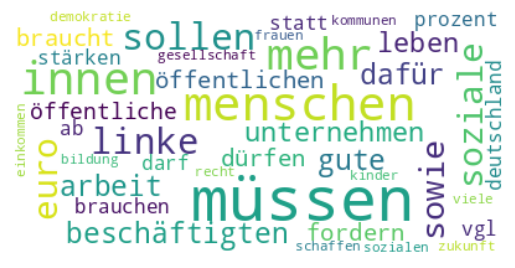

afd


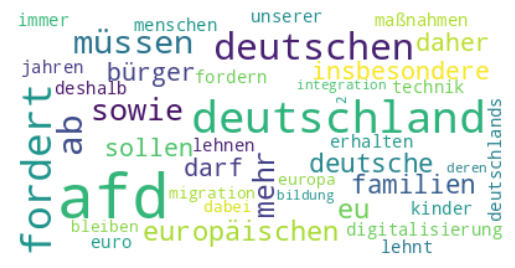

fdp


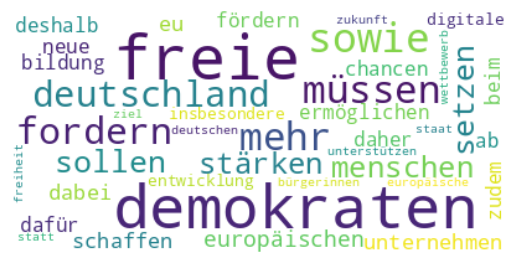

spd


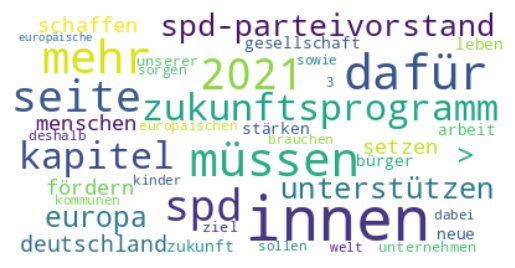

In [100]:
for idx, row in df.iterrows():
    print(row['party'])
    top_words = most_common_words(row['words'], n=40)
    generate_word_clouds(dict(top_words))

## Mehrere Wörter - Bigrams und Trigrams

In [ ]:
from nltk.collocations import *
bigrams = nltk.collocations.BigramAssocMeasures()

In [ ]:
fdp_words = df.loc[1, 'words']
bigrams = list(nltk.bigrams(fdp_words))

fdist = FreqDist(bigrams)
fdist.most_common(20)

In [ ]:
fdp_words = df.loc[1, 'words']
bigrams = list(nltk.trigrams(fdp_words))

fdist = FreqDist(bigrams)
fdist.most_common(20)

In [ ]:
def most_common_words(words, n=20, ngrams=''):
    if ngrams == 'bigrams':
        words = list(nltk.bigrams(words))
    if ngrams == 'trigrams':
        words = list(nltk.trigrams(words))
    fdist = FreqDist(words)
    return fdist.most_common(n)

In [ ]:
for idx, row in df.iterrows():
    print(row['party'])
    top_words = most_common_words(row['words'], n=20, ngrams='bigrams')
    for idx, word_freq in enumerate(top_words):
        if type(word_freq[0]) != str:
            top_words[idx] = (' '.join(word_freq[0]), word_freq[1])
    generate_word_clouds(dict(top_words))

# Kurs Evaluation

https://ahaslides.com/C7S01

![Kurs Evaluation](../imgs/qr_evaluation.png)